# Microtraining - Data-Analysis with Keras and Tensorflow

# Getting started with feed forward neural networks


This Training will show the basics step you will need to perform, to get started with Deep Learning on your dataset. The main idea is to give you a short introduction into the most important stages of data analysis with neural networks. The main stages are: 
* Data preprocessing
* Model setup
* Model training
* Model testing
* (Inference)
* (Deployment)

## Tensorflow and Keras

In this course we are using Tensorflow in combination with Keras as the main framework for our analysis. 






### Tensorflow 


![Tensorflow](https://upload.wikimedia.org/wikipedia/commons/1/11/TensorFlowLogo.svg)



[Tensorflow](https://www.tensorflow.org/) is a opensource framework provided and developed for machine and deep learning. The main purpose is to provide an easy and effective way to manipulate and calculate tensors.  

One of the key features of tensorflow is the ability to build computation graphs. These computation graphs can be build by using for example a High-Level language like Python. Afterwards these graphs are than initated and executed in C++.
The image below shows such a typical computation. A Input Tensor "flows" through" the graph.

<img src="https://www.tensorflow.org/images/tensors_flowing.gif" class="center">
<stlye>
.center {
    display: block;
    margin-left: auto;
    margin-right: auto;
}



### Keras

<img src="https://s3.amazonaws.com/keras.io/img/keras-logo-2018-large-1200.png" width="300">



[Keras](https://keras.io/) is a wrapper library which provides an easy and highly abstracted interface for low level frameworks like Tensorflow. Standard layers like Dense layers or CNN layers are already included in Keras making it the goto framework if you want to build fast prototype network. Of course the great flexibilty Tensorflow can provide gets lost, when you use Keras but it is possible to combine these two frameworks since Keras is basically just a wrapper for Tensorflow.   


In this workshop we will just import tensorflow since keras is part of tensorflow since Tensorflow 1.2.

In [1]:
#imports for the scripts
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import scipy

## Data preprocessing

<img src="http://tomba.co/analysis-consult/images/data-cleansing.jpg">



In [ ]:
Data preprocessing is all about getting your data ready for your analysis. Normally this step takes about 80%-90% of the total time. 

When building neural networks you typically perform the following steps during this process:


* Loading your data
* Removing unwanted or corrupted data
* Matching your labels
* Shuffel
* Batch
* Split

## Data Loading

<img src="./pics_jupyter/Experimentaufbau.png">

The dataset was created by shifting the laser focus up and down on purpose.


* 4000 PNG Images
* 2 Classes (-1mm and 2mm)
* seperated by folders




<img src="./fokus-1/0000.png" align="left"></img>

In [2]:
# Load datasets

from PictureLoader import PictureLoader
from IPython.display import clear_output

Loader= PictureLoader()
pics_1,pics_2=Loader.LoadPictures()


./fokus-1
Loading from folder:  ./fokus-1
./fokus-1\0000.png  loaded
./fokus-1\0100.png  loaded
./fokus-1\0200.png  loaded
./fokus-1\0300.png  loaded
./fokus-1\0400.png  loaded
./fokus-1\0500.png  loaded
./fokus-1\0600.png  loaded
./fokus-1\0700.png  loaded
./fokus-1\0800.png  loaded
./fokus-1\0900.png  loaded
./fokus-1\1000.png  loaded
./fokus-1\1100.png  loaded
./fokus-1\1200.png  loaded
./fokus-1\1300.png  loaded
./fokus-1\1400.png  loaded
./fokus-1\1500.png  loaded
./fokus-1\1600.png  loaded
./fokus-1\1700.png  loaded
./fokus-1\1800.png  loaded
./fokus-1\1900.png  loaded
fokus-1 data shape:  (2000, 256, 256)
./fokus+2
Loading from folder:  ./fokus+2
./fokus+2\0000.png  loaded
./fokus+2\0100.png  loaded
./fokus+2\0200.png  loaded
./fokus+2\0300.png  loaded
./fokus+2\0400.png  loaded
./fokus+2\0500.png  loaded
./fokus+2\0600.png  loaded
./fokus+2\0700.png  loaded
./fokus+2\0800.png  loaded
./fokus+2\0900.png  loaded
./fokus+2\1000.png  loaded
./fokus+2\1100.png  loaded
./fokus+2\1200

10.94709147644043


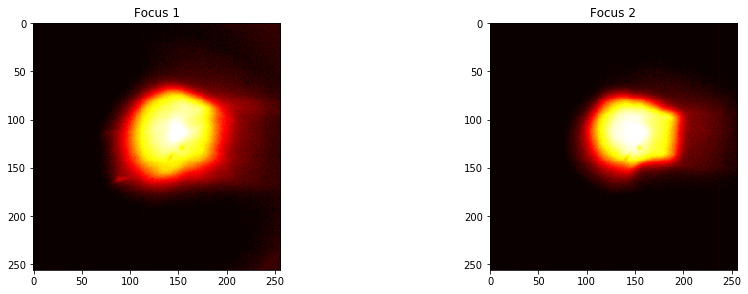

In [3]:
print(np.mean(pics_1-pics_2))
#Change me for different frames
pic1_frame=0
pic2_frame=0
#Plotting
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title("Focus 1")
plt.imshow(pics_1[pic1_frame,:,:],cmap="hot")
plt.subplot(2,2,2)
plt.title("Focus 2")
plt.imshow(pics_2[pic2_frame,:,:],cmap="hot")

In [4]:
# Gernerate Labels
labels_1=np.repeat([[0,1]],pics_1.shape[0],axis=0)
labels_2=np.repeat([[1,0]],pics_2.shape[0],axis=0)
print("Focus 1\n",labels_1)
print("Focus 2\n",labels_2)

Focus 1
 [[0 1]
 [0 1]
 [0 1]
 ...
 [0 1]
 [0 1]
 [0 1]]
Focus 2
 [[1 0]
 [1 0]
 [1 0]
 ...
 [1 0]
 [1 0]
 [1 0]]


In [5]:
# Create combined dataset

images=np.append(pics_1,pics_2,axis=0)
labels=np.append(labels_1,labels_2,axis=0)

In [6]:
# Shuffle data
rng_state = np.random.get_state()
np.random.shuffle(images)
np.random.set_state(rng_state)
np.random.shuffle(labels)

In [46]:
# split train test
train_percentage=0.1

split=int(images.shape[0]*train_percentage)

train_images=images[:split]
test_images=images[split:]
train_labels=labels[:split]
test_labels=labels[split:]

print(train_images.shape)
print(train_labels.shape)



(400, 256, 256)
(400, 2)


In [65]:
# Build Architecture


model = tf.keras.models.Sequential([
  tf.keras.layers.Reshape((256,256,1),input_shape=(256,256)),
  tf.keras.layers.AveragePooling2D(pool_size=(4, 4)),
  tf.keras.layers.Flatten(),

  tf.keras.layers.Dense(100, activation=tf.nn.relu),
    

  tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])

# Model compilation
model.compile('adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [66]:
# Training

model.fit(train_images, train_labels,batch_size=400 , epochs=5,verbose=1)
# Test
model.evaluate(test_images, test_labels)


Epoch 1/5
400/400 [==============================] - 4s 9ms/step - loss: 0.2753 - acc: 0.4825
Epoch 2/5
400/400 [==============================] - 1s 2ms/step - loss: 0.4815 - acc: 0.5175
Epoch 3/5
400/400 [==============================] - 1s 1ms/step - loss: 0.4823 - acc: 0.5175
Epoch 4/5
400/400 [==============================] - 1s 1ms/step - loss: 0.4824 - acc: 0.5175
Epoch 5/5
3600/3600 [==============================] - 6s 2ms/step


[0.5018139052391052, 0.49805555555555553]

Exercise:
* Add more layers to your network and run it.
* Increase the size of your network and run it.
* run your training phase with 10 instead of 3 epochs.
* change your train test ratio.

In [8]:
# Inference


model = tf.keras.models.Sequential([
  tf.keras.layers.Reshape((256,256,1),input_shape=(256,256)),
  tf.keras.layers.MaxPooling2D(pool_size=(5, 5)),
  tf.keras.layers.Conv2D(15, (40, 40), padding='same'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Conv2D(15, (15, 15), padding='same'),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(5000, activation=tf.nn.relu),
  tf.keras.layers.Dense(5000, activation=tf.nn.relu),
  tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])
#Optimizer
rms_prop=tf.keras.optimizers.RMSprop(lr=0.1, rho=0.9, epsilon=None, decay=0.0)

# Model compilation
model.compile('adam',
              loss='mean_squared_error',
              metrics=['accuracy'])